<a href="https://colab.research.google.com/github/PromitHal/AI_ML/blob/main/ANN_heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('heart.csv')

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
X=data.drop(columns="target")

In [8]:
Y=data["target"]

In [28]:
X.shape

(303, 13)

In [10]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

**Normalizing the data**

In [16]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()

In [17]:
X_scaled=sc.fit_transform(X)

In [18]:
X_scaled[0]

array([0.70833333, 1.        , 1.        , 0.48113208, 0.24429224,
       1.        , 0.        , 0.60305344, 0.        , 0.37096774,
       0.        , 0.        , 0.33333333])

In [19]:
type(X_scaled)

numpy.ndarray

**One hot encoding the target variable**

In [24]:
Y_encoded=pd.get_dummies(Y)

In [25]:
Y_encoded

,0,1
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
298,1,0
299,1,0
300,1,0
301,1,0


In [26]:
from sklearn.model_selection import train_test_split 
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y_encoded,test_size=0.1)

**Building ANN**

In [70]:
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [87]:
model=Sequential()
model.add(Dense(16,input_dim=X.shape[1],activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dense(2,activation='softmax'))

**Compiling our model**

In [88]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [89]:
history=model.fit(X_train,Y_train,epochs=100,validation_split=0.1,batch_size=30)

Epoch 1/100
9/9 [==============================] - 1s 22ms/step - loss: 0.6885 - accuracy: 0.5574 - val_loss: 0.6957 - val_accuracy: 0.3929
Epoch 2/100
9/9 [==============================] - 0s 5ms/step - loss: 0.6710 - accuracy: 0.5574 - val_loss: 0.6812 - val_accuracy: 0.3929
Epoch 3/100
9/9 [==============================] - 0s 5ms/step - loss: 0.6520 - accuracy: 0.5779 - val_loss: 0.6538 - val_accuracy: 0.5357
Epoch 4/100
9/9 [==============================] - 0s 5ms/step - loss: 0.6196 - accuracy: 0.6803 - val_loss: 0.5943 - val_accuracy: 0.6786
Epoch 5/100
9/9 [==============================] - 0s 5ms/step - loss: 0.5746 - accuracy: 0.7213 - val_loss: 0.5148 - val_accuracy: 0.8214
Epoch 6/100
9/9 [==============================] - 0s 5ms/step - loss: 0.5241 - accuracy: 0.7746 - val_loss: 0.4342 - val_accuracy: 0.8214
Epoch 7/100
9/9 [==============================] - 0s 5ms/step - loss: 0.4852 - accuracy: 0.7582 - val_loss: 0.3375 - val_accuracy: 0.8929
Epoch 8/100
9/9 [=========

In [40]:
!pip install plot_keras_history

  Created wheel for plot-keras-history: filename=plot_keras_history-1.1.30-py3-none-any.whl size=8793 sha256=3b48a93873d52cbeb4a718e8ba00b6f64e8b41dab1ca17b1be8fafb912b9fc90
  Stored in directory: /root/.cache/pip/wheels/b0/60/47/8c5aa37c06be5e97879ec467bc2e6a30b315d95f662c63a503
  Created wheel for sanitize-ml-labels: filename=sanitize_ml_labels-1.0.29-py3-none-any.whl size=7877 sha256=12ec21932a30fb6f23e89a1f410e35d13a78c902d66a3d4670b07d4fd9a97ea3
  Stored in directory: /root/.cache/pip/wheels/c2/f5/71/d1c459da10abec864a1979b449edbf37d4a82ab3e38a3625a8
  Created wheel for compress-json: filename=compress_json-1.0.4-py3-none-any.whl size=4585 sha256=85a430efd9f3393e646f97af7227e5a10ecbe48c29284152c4aa399877d8c29a
  Stored in directory: /root/.cache/pip/wheels/1e/ef/1e/5d403c5632b0462471a8d26049d0c138134d0255ec60ce4c14
Successfully built plot-keras-history sanitize-ml-labels compress-json


In [90]:
from plot_keras_history import show_history, plot_history

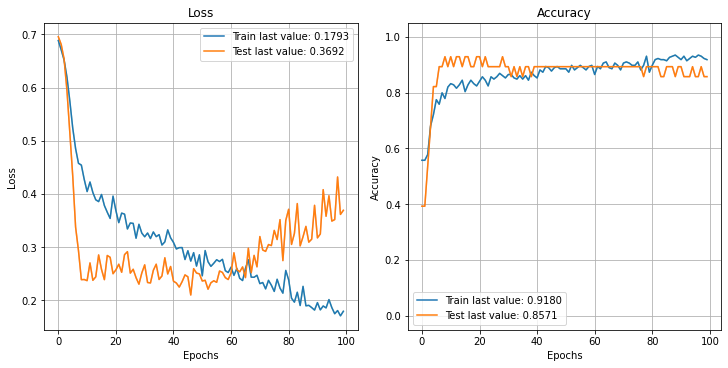

In [91]:
show_history(history)

(<Figure size 720x360 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7efbf47b8e10>,
       dtype=object))

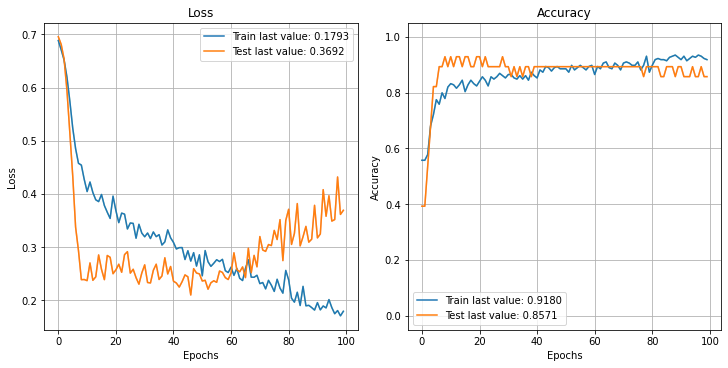

In [96]:
plot_history(history)

Predictions

In [93]:
predict=model.predict(X_test)

In [94]:
from sklearn.metrics import accuracy_score

In [95]:
score=accuracy_score(Y_test,predict)

ValueError: ignored